In [851]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [852]:
data=pd.read_excel(r"C:\John\ICTAK\Data Science and Analytics\Assignments\iris.xls")
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [853]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [854]:
data['SL'].skew()

0.3068227108046868

In [855]:
data['SW'].skew()

0.37781843718771746

In [856]:
data['PL'].skew()

-0.2689053923783847

### Since the skew value of all the 3 columns points to a symmetric distribution, we can use the respective means to fill in the missing values

array([[<Axes: title={'center': 'SL'}>, <Axes: title={'center': 'SW'}>],
       [<Axes: title={'center': 'PL'}>, <Axes: title={'center': 'PW'}>]],
      dtype=object)

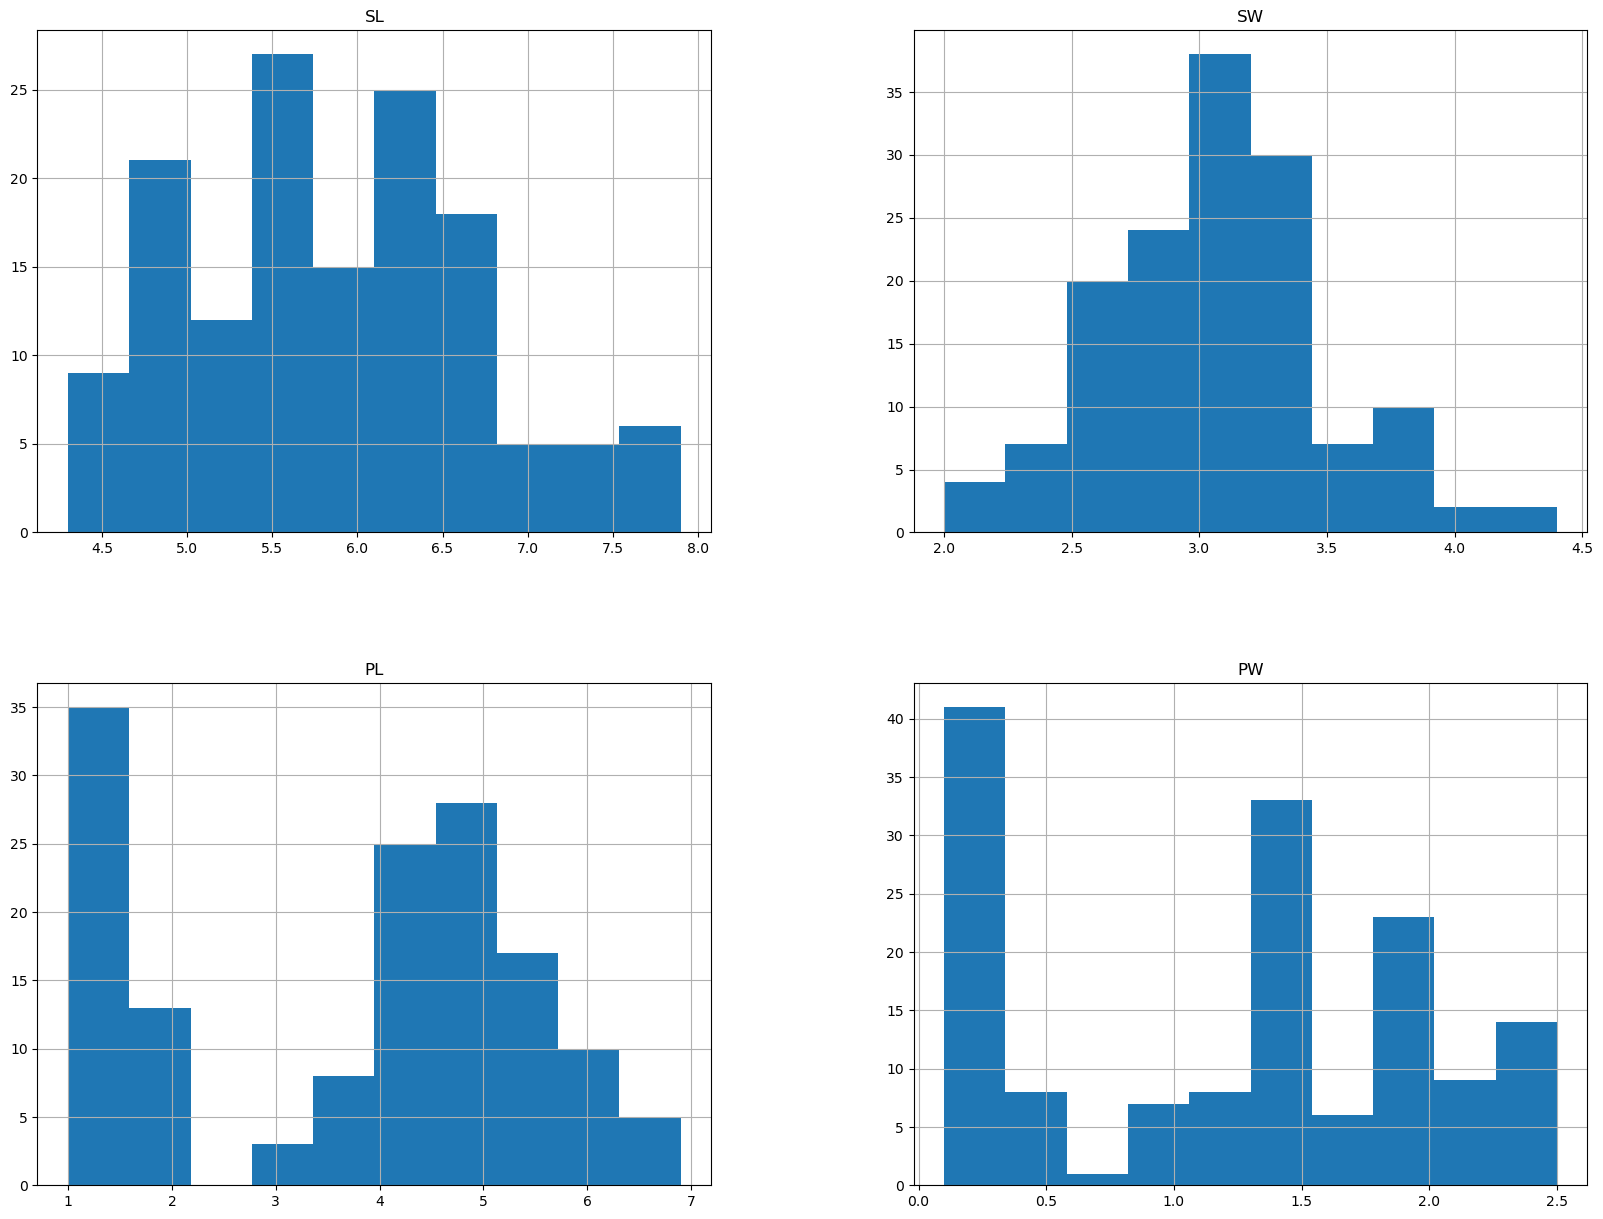

In [857]:
freqgraph=data.select_dtypes(include='float64')
freqgraph.hist(figsize=(20,15))

In [858]:
data['SL'].mean()

5.855944055944056

In [859]:
data['SW'].mean()

3.0493055555555557

In [860]:
data['PL'].mean()

3.7562499999999996

In [861]:
dt=data.copy()
dt

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [862]:
num_columns=dt.select_dtypes(include='float64')
num_columns

,SL,SW,PL,PW
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,NaN,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,NaN,2.0
148,6.2,3.4,5.4,2.3


In [863]:
dt=dt.fillna(num_columns.mean())
dt

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.40000,0.2,Iris-setosa
1,4.900000,3.0,1.40000,0.2,Iris-setosa
2,5.855944,3.2,1.30000,0.2,Iris-setosa
3,4.600000,3.1,1.50000,0.2,Iris-setosa
4,5.000000,3.6,1.40000,0.2,Iris-setosa
...,...,...,...,...,...
145,6.700000,3.0,5.20000,2.3,Iris-virginica
146,6.300000,2.5,5.00000,1.9,Iris-virginica
147,6.500000,3.0,3.75625,2.0,Iris-virginica
148,6.200000,3.4,5.40000,2.3,Iris-virginica


In [864]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Identifying whether the numerical columns have any outliers

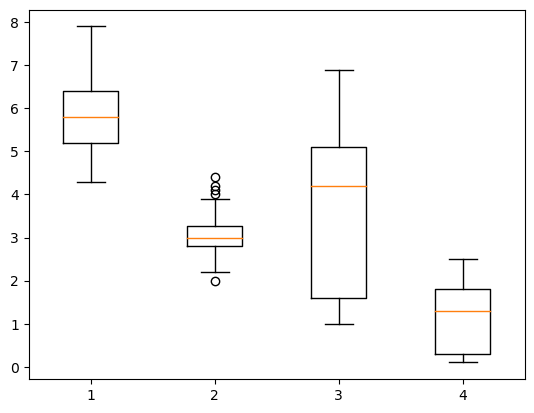

In [865]:
plt.boxplot(dt.drop('Classification',axis=1))
plt.show()

Handling the outliers using the clip method

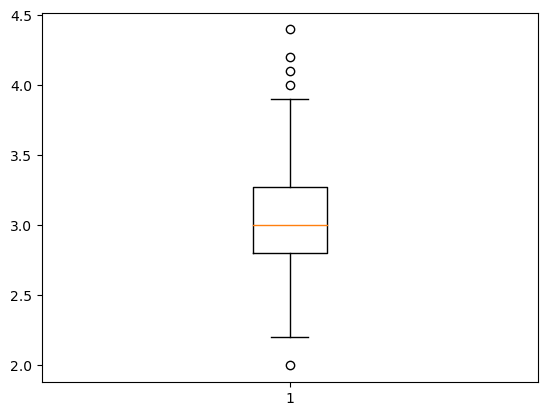

In [866]:
plt.boxplot(dt['SW'])
plt.show()

In [867]:
Q1=np.percentile(dt['SW'],25,method='midpoint')
Q2=np.percentile(dt['SW'],50,method='midpoint')
Q3=np.percentile(dt['SW'],75,method='midpoint')

print('Q1 is: ',Q1)
print('Q2 is: ',Q2)
print('Q3 is: ',Q3)

Q1 is:  2.8
Q2 is:  3.0
Q3 is:  3.25


In [868]:
IQR=Q3-Q1
print(IQR)

0.4500000000000002


In [869]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

print('Lower value: ',low_lim)
print('Upper value: ',up_lim)

Lower value:  2.1249999999999996
Upper value:  3.9250000000000003


In [870]:
outliers=[]

for i in dt['SW']:
    if(i<low_lim) or (i>up_lim):
        outliers.append(i)
        
print(outliers)        

[4.0, 4.4, 4.1, 4.2, 2.0]


In [871]:
dt['SW']=dt['SW'].clip(lower=low_lim,upper=up_lim)

In [872]:
outliers=[]

for i in dt['SW']:
    if(i<low_lim) or (i>up_lim):
        outliers.append(i)
        
print(outliers)        

[]


In [873]:
dt.drop('Classification',axis=1).corr()

,SL,SW,PL,PW
SL,1.000000,-0.100153,0.831400,0.800726
SW,-0.100153,1.000000,-0.411147,-0.336800
PL,0.831400,-0.411147,1.000000,0.936389
PW,0.800726,-0.336800,0.936389,1.000000


In [874]:
dt

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.40000,0.2,Iris-setosa
1,4.900000,3.0,1.40000,0.2,Iris-setosa
2,5.855944,3.2,1.30000,0.2,Iris-setosa
3,4.600000,3.1,1.50000,0.2,Iris-setosa
4,5.000000,3.6,1.40000,0.2,Iris-setosa
...,...,...,...,...,...
145,6.700000,3.0,5.20000,2.3,Iris-virginica
146,6.300000,2.5,5.00000,1.9,Iris-virginica
147,6.500000,3.0,3.75625,2.0,Iris-virginica
148,6.200000,3.4,5.40000,2.3,Iris-virginica


In [875]:
cls=dt['Classification']
cls=pd.DataFrame(cls)
cls

,Classification
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


### Since SL and PW have strong correlations with PL, we can drop these 2 columns.

In [876]:
dt.drop(['SL','PW','Classification'],axis=1,inplace=True)
dt

,SW,PL
0,3.5,1.40000
1,3.0,1.40000
2,3.2,1.30000
3,3.1,1.50000
4,3.6,1.40000
...,...,...
145,3.0,5.20000
146,2.5,5.00000
147,3.0,3.75625
148,3.4,5.40000


Classification column is the target variable. So we scale other columns using MinMax method

In [877]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()

In [878]:
dt_final=minmax.fit_transform(dt)
dt_final=pd.DataFrame(dt_final)
dt_final

,0,1
0,0.763889,0.067797
1,0.486111,0.067797
2,0.597222,0.050847
3,0.541667,0.084746
4,0.819444,0.067797
...,...,...
145,0.486111,0.711864
146,0.208333,0.677966
147,0.486111,0.467161
148,0.708333,0.745763


Label encoding the classification column and then joining it to the previously scaled dataset

In [879]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [880]:
cls=le.fit_transform(cls)
classification=pd.DataFrame(cls)
classification[2]=classification[0]
classification.drop(0,axis=1,inplace=True)
classification

C:\Users\johne\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,2
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [881]:
final=dt_final.join(classification)
final

,0,1,2
0,0.763889,0.067797,0
1,0.486111,0.067797,0
2,0.597222,0.050847,0
3,0.541667,0.084746,0
4,0.819444,0.067797,0
...,...,...,...
145,0.486111,0.711864,2
146,0.208333,0.677966,2
147,0.486111,0.467161,2
148,0.708333,0.745763,2


Setting the target and independent variables

In [882]:
y=final[2]
x=final.drop(2,axis=1)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.25)

## Logistic Regression

In [883]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()

In [884]:
log_model=log_reg.fit(x_train,y_train)
log_pred=log_model.predict(x_test)

In [885]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,f1_score,precision_score
print('Accuracy : ',accuracy_score(y_test,log_pred))

Accuracy :  0.8947368421052632


## SVC

In [886]:
from sklearn.svm import SVC
svc=SVC()

In [887]:
svc_model=svc.fit(x_train,y_train)
svc_pred=svc_model.predict(x_test)

In [888]:
print(confusion_matrix(y_test,svc_pred))

[[14  1  0]
 [ 0 10  1]
 [ 0  1 11]]


In [889]:
print('Accuracy : ',accuracy_score(y_test,svc_pred))

Accuracy :  0.9210526315789473


### SVC with kernel as linear

In [890]:
svc_lin=SVC(kernel='linear')

In [891]:
svc_model2=svc_lin.fit(x_train,y_train)
svc_pred2=svc_model2.predict(x_test)

In [892]:
print(confusion_matrix(y_test,svc_pred2))

[[14  1  0]
 [ 0 11  0]
 [ 0  1 11]]


In [893]:
print(confusion_matrix(y_test,svc_pred2))

[[14  1  0]
 [ 0 11  0]
 [ 0  1 11]]


In [894]:
print('Accuracy : ',accuracy_score(y_test,svc_pred2))

Accuracy :  0.9473684210526315


### SVC with kernel as poly

In [895]:
svc_poly=SVC(kernel='poly')

In [896]:
svc_model3=svc_poly.fit(x_train,y_train)
svc_pred3=svc_model3.predict(x_test)

In [897]:
print(confusion_matrix(y_test,svc_pred3))

[[14  1  0]
 [ 1  9  1]
 [ 0  2 10]]


In [898]:
print('Accuracy : ',accuracy_score(y_test,svc_pred3))

Accuracy :  0.868421052631579


## Decision Tree

In [899]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

In [900]:
dtc_model=dtc.fit(x_train,y_train)
dtc_pred=dtc_model.predict(x_test)

In [901]:
print(confusion_matrix(y_test,dtc_pred))

[[14  0  1]
 [ 1  7  3]
 [ 0  0 12]]


In [902]:
print('Accuracy : ',accuracy_score(y_test,dtc_pred))

Accuracy :  0.868421052631579


## Random Forest

In [903]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [904]:
rfc_model=rfc.fit(x_train,y_train)
rfc_pred=rfc_model.predict(x_test)

In [905]:
print(confusion_matrix(y_test,rfc_pred))

[[14  1  0]
 [ 1  9  1]
 [ 0  1 11]]


In [906]:
print('Accuracy : ',accuracy_score(y_test,rfc_pred))

Accuracy :  0.8947368421052632


### Random Forest after hyperparameter tuning

In [907]:
rfc_2=RandomForestClassifier(n_estimators=75,max_depth=75,criterion='entropy',min_samples_split=3)
rfc_model2=rfc_2.fit(x_train,y_train)
rfc_pred2=rfc_model2.predict(x_test)

In [908]:
print('Accuracy : ',accuracy_score(y_test,rfc_pred2))

Accuracy :  0.8947368421052632


 Hence, it is clear that the model constructed using the SVC method (with kernel as linear) is the best model, since the accuracy score of this model (0.94) is higher than other models